In [30]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as spim
from porespy.tools import norm_to_uniform

In [21]:
blobiness = 2
shape = (1000, 1000)
blobiness = np.array(blobiness)
shape = np.array(shape)
sigma = np.mean(shape)/(40*blobiness)

(-0.5, 999.5, 999.5, -0.5)

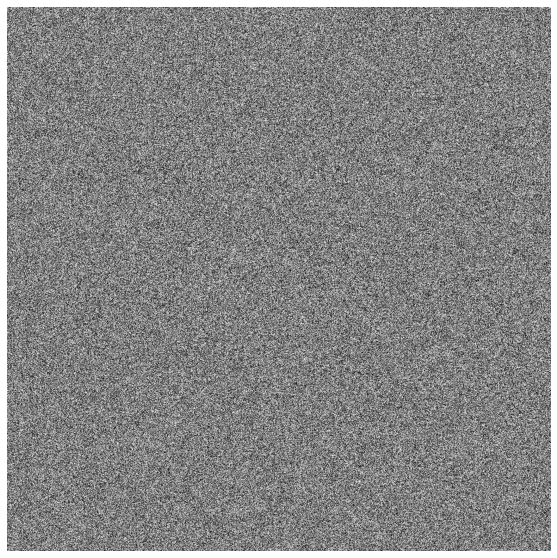

In [22]:
im = np.random.random(shape)

im_noise = np.copy(im)
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(im, cmap='gray')
ax.axis("off")

In [23]:
sigma = 40
im = spim.gaussian_filter(im, sigma=sigma)

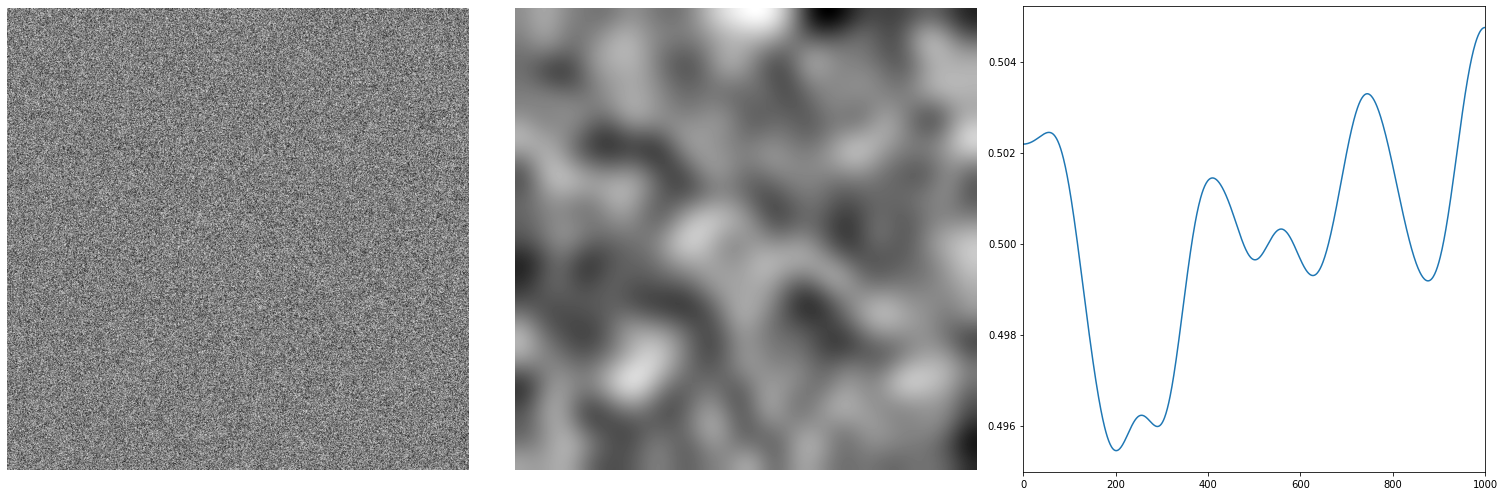

In [24]:
fig, axes = plt.subplots(ncols=3, figsize=(21,7))
num_row = 300

axes[0].imshow(im_noise, cmap='gray')
axes[0].axis("off")

axes[1].imshow(im, cmap='gray')
axes[1].axis("off")

axes[2].plot(im[num_row])
axes[2].set_xlim(xmin=0, xmax=len(im[num_row]))
plt.tight_layout()

In [25]:
im_normed = norm_to_uniform(im, scale=[0, 1])

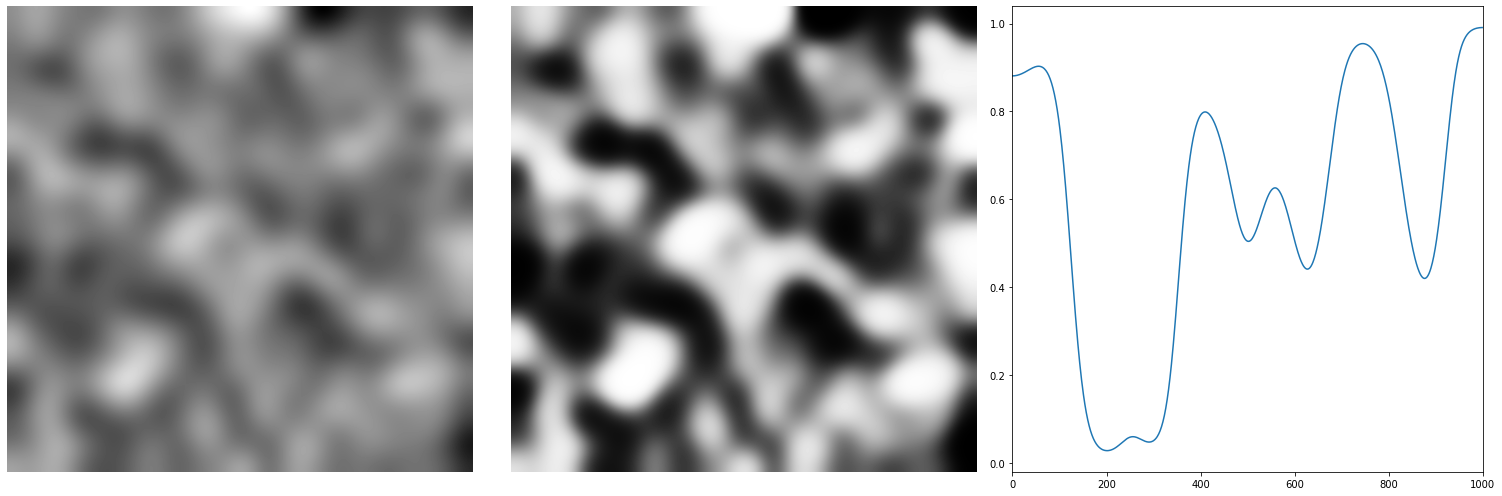

In [26]:
fig, axes = plt.subplots(ncols=3, figsize=(21,7))
num_row = 300

axes[0].imshow(im, cmap='gray')
axes[0].axis("off")

axes[1].imshow(im_normed, cmap='gray')
axes[1].axis("off")

axes[2].plot(im_normed[num_row])
axes[2].set_xlim(xmin=0, xmax=len(im_normed[num_row]))
plt.tight_layout()

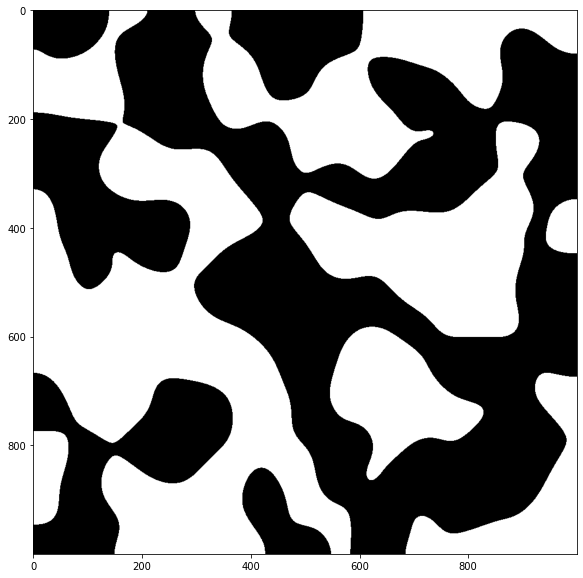

In [32]:
porosity = 0.5

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(im_normed<porosity, cmap='gray')

In [52]:
def gen_phantom(shape, porosity, blobiness):
    shape = np.array(shape)
    if np.size(shape) == 1:
        shape = np.full((3, ), int(shape))
    im = np.random.random(shape)
    im = spim.gaussian_filter(im, sigma=blobiness)
    im = norm_to_uniform(im, scale=[0, 1])
    if porosity:
        im = im > porosity
    return im

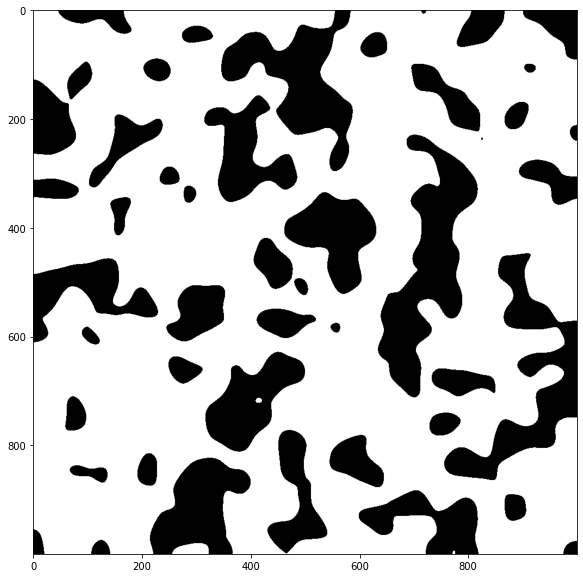

In [53]:
fig, ax = plt.subplots(figsize=(10,10))
phantom = phantom(shape=(1000, 1000), porosity=0.3, blobiness=20)
ax.imshow(phantom, cmap='gray')

In [46]:
np.sum(phantom) / (1000 * 1000)

0.51846